In [42]:
import pandas as pd
import os
import shutil
%matplotlib inline
import matplotlib.pyplot as plt

In [57]:
# 為了瞭解預測的股價，最後決定試沒正規化的資料
# 把csv讀入, 先試1股
df = pd.read_csv(r'C:\Users\DA01028\Desktop\stock_analysis_data_cleaning\2_eda_沒正規化資料_tb\2702.csv', delimiter=',') 
df.index = df.date

In [22]:
df

,date,rsv,rsi,macd,5ma,10ma,20ma,wr,dma,trix,boll,boll_ub,boll_lb,close
date,,,,,,,,,,,,,,
2016-01-18,2016-01-18,54.901961,34.625097,-0.258609,18.170769,8.111569,0.000000,45.098039,-0.238182,-0.283591,56.718182,59.505034,53.931330,56.30
2016-01-19,2016-01-19,65.957447,38.869470,-0.204460,21.885205,11.540002,0.000000,34.042553,-0.428333,-0.265038,56.708333,59.366369,54.050298,56.60
2016-01-20,2016-01-20,12.195122,24.203359,-0.308459,23.724709,12.979121,1.333333,87.804878,-0.610000,-0.264850,56.500000,59.455221,53.544779,54.00
2016-01-21,2016-01-21,22.222222,22.128359,-0.417071,27.368235,14.178253,5.787234,77.777778,-0.708571,-0.277441,56.278571,59.566010,52.991133,53.40
2016-01-22,2016-01-22,25.925926,24.453349,-0.481791,31.607231,15.752498,8.111569,74.074074,-0.870000,-0.292451,56.100000,59.556671,52.643329,53.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,2020-12-25,0.000000,38.919286,-0.238934,95.445043,129.711778,169.028459,100.000000,-0.149000,-0.087865,39.270000,41.056322,37.483678,38.20
2020-12-28,2020-12-28,39.285714,48.049672,-0.213242,96.684902,121.215306,165.415760,60.714286,-0.193000,-0.097768,39.170000,40.826693,37.513307,38.75
2020-12-29,2020-12-29,32.142857,46.683301,-0.198660,95.702074,112.850787,161.897355,67.857143,-0.198000,-0.102729,39.072500,40.599270,37.545730,38.65


In [58]:
# 把目標變數y-收盤價上移一位, 以餵機器當天技術指標來預測隔天收盤價
# 由於是time series data, 所以決定不用train_test_split及KFold來切分training data & testing data
X_trainh = df.loc['2016-01-18':'2019-12-31', 'rsv':'boll_lb']
X_train = df.loc['2016-01-18':'2019-12-31', 'rsv':'trix']
y_train = df.loc['2016-01-19':'2020-01-02', 'close']
X_testh = df.loc['2020-01-02':'2020-12-30', 'rsv':'boll_lb']
X_test = df.loc['2020-01-02':'2020-12-30', 'rsv':'trix']
y_test = df.loc['2020-01-03':'2020-12-31', 'close']

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


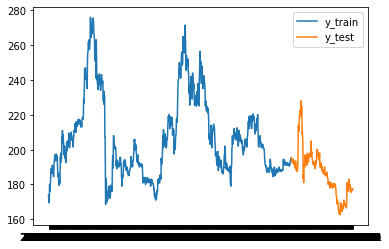

In [169]:
plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.legend(loc='best')

# go back to check matplotlib

training data r2 : 0.9686941313150804
testing data r2 : 0.9356885499574537


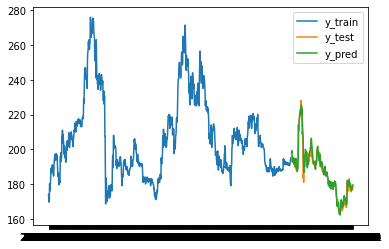

In [43]:
# 線性迴歸 (Linear Regression)
# 保留boll, boll_up, boll_lb相關係數過高的特徵

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

model_lrh = LinearRegression()
model_lrh.fit(X_trainh, y_train)
# print(model_lrh.intercept_)
# print(model_lrh.coef_)
train_pred_y = model_lrh.predict(X_trainh)
test_pred_y = model_lrh.predict(X_testh)
test_pred_y = pd.DataFrame(test_pred_y, index = y_test.index,columns=['y_pred'])
print('training data r2 :', r2_score(y_train, train_pred_y))
print('testing data r2 :', r2_score(y_test, test_pred_y))
# print(cross_val_score(model_lrh, X, y, scoring= 'r2'))

# r2 0.93

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(test_pred_y, label = 'y_pred')
plt.legend(loc='best')


training data r2 : 0.3905862014572794
testing data r2 : -0.9256430098614683


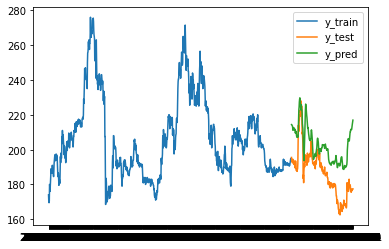

In [47]:
# 線性迴歸 (Linear Regression)
# 去除boll, boll_up, boll_lb相關係數過高的特徵

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
# print(model_lr.intercept_)
# print(model_lr.coef_)
train_pred_y = model_lr.predict(X_train)
test_pred_y = model_lr.predict(X_test)
test_pred_y = pd.DataFrame(test_pred_y, index = y_test.index,columns=['y_pred'])
print('training data r2 :', r2_score(y_train, train_pred_y))
print('testing data r2 :', r2_score(y_test, test_pred_y))
# print(cross_val_score(model_lr, X, y, cv=cv, scoring= 'r2'))

# r2 過低

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(test_pred_y, label = 'y_pred')
plt.legend(loc='best')


0.9185694130988001


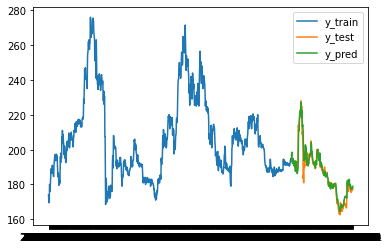

In [52]:
# SVM
# 保留boll, boll_up, boll_lb相關係數過高的特徵

from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# # 先執行以下這段程式碼找出最適切參數
# param_grid = {'C':[0.001, 0.01, 0.1, 10, 100, 1000], 'epsilon':[0, 1 ,0.1]}
# model_svrh = SVR(kernel='rbf')
# model_svrh=GridSearchCV(model_svrh, param_grid, scoring='r2')
# model_svrh.fit(X_trainh, y_train)
# print(model_svrh.best_score_)
# print(model_svrh.best_params_)

# 再利用找出的最適切參數來放入以下程式碼以查看r2成績
model_svrh = SVR(kernel='rbf',C=1000,epsilon=0.1)
model_svrh.fit(X_trainh, y_train)
y_pred = model_svrh.predict(X_testh)
y_pred = pd.DataFrame(y_pred, index = y_test.index,columns=['y_pred'])
print(r2_score(y_test, y_pred)) 

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend(loc='best')

# grid_search出來的參數C:100->1000, epsilon:0.1, r2 0.77->0.91


-0.20664912713768735


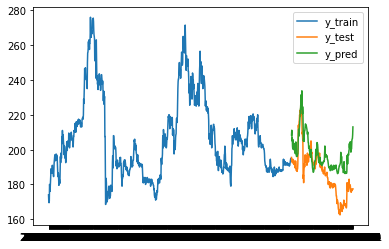

In [53]:
# SVM
# 去除boll, boll_up, boll_lb相關係數過高的特徵

from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# # 先執行以下這段程式碼找出最適切參數
# model_svr = SVR(kernel='rbf')
# param_grid = {'C':[0.001, 0.01, 0.1, 10, 100, 1000], 'epsilon':[0, 1 ,0.1]}
# model_svr=GridSearchCV(model_svr, param_grid,scoring='r2')
# model_svr.fit(X_train, y_train)
# print(model_svr.best_score_)
# print(model_svr.best_params_)

# 再利用找出的最適切參數來放入以下程式碼以查看r2成績
model_svr = SVR(kernel='rbf',C=10, epsilon=1)
model_svr.fit(X_train, y_train)
y_pred = model_svr.predict(X_test)
y_pred = pd.DataFrame(y_pred, index = y_test.index,columns=['y_pred']) 
print(r2_score(y_test, y_pred)) 

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend(loc='best')

# grid_search出來的參數C:0.1->10, epsilon:0->1, r2 過低


0.3598142201709398


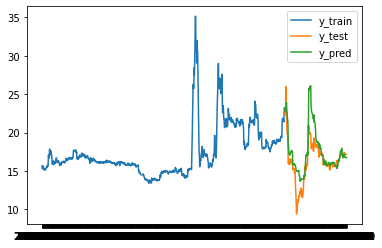

In [59]:
# 隨機森林
# 保留boll, boll_up, boll_lb相關係數過高的特徵

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# # 先執行以下這段程式碼找出最適切參數
# param_grid = {'max_depth':[5, 8, 15], 'n_estimators':[100, 150, 200]} # default n_estimator change to 100 in 0.22
# model_rfh = RandomForestRegressor(random_state=0)
# model_rfh=GridSearchCV(model_rfh, param_grid,scoring='r2')
# model_rfh.fit(X_trainh, y_train)
# print(model_rfh.best_score_)
# print(model_rfh.best_params_)

# 再利用找出的最適切參數來放入以下程式碼以查看r2成績
model_rfh = RandomForestRegressor(random_state=0, max_depth=15, n_estimators=200)
model_rfh.fit(X_trainh,y_train)
y_pred = model_rfh.predict(X_testh)
y_pred = pd.DataFrame(y_pred, index = y_test.index,columns=['y_pred']) 
print(r2_score(y_test, y_pred)) 

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend(loc='best')

# grid_search出來的參數n_estimators:100->200, max_depth:8->15 r2 0.74


In [60]:
df['predict'] = df.loc['2016-01-18':'2020-01-02', 'close'].append(y_pred['y_pred'])

In [61]:
df.to_csv(r'./2702.csv', sep = ',', index = False)

In [19]:
y_pred

,y_pred
date,
2020-01-03,193.429998
2020-01-06,194.445297
2020-01-07,192.278321
2020-01-08,192.179537
2020-01-09,191.174005
...,...
2020-12-25,183.325000
2020-12-28,182.910000
2020-12-29,181.535000


In [11]:
type(df.loc['2016-01-18':'2020-01-02', 'close'])

pandas.core.series.Series

-0.9484657744185909


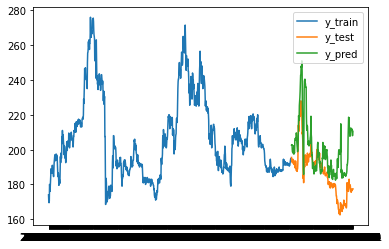

In [55]:
# 隨機森林
# 去除boll, boll_up, boll_lb相關係數過高的特徵

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 先執行以下這段程式碼找出最適切參數
# param_grid = {'max_depth':[5, 8, 15], 'n_estimators':[100, 150, 200]} # default n_estimator change to 100 in 0.22
# model_rf = RandomForestRegressor(random_state=0)
# model_rf=GridSearchCV(model_rf, param_grid, scoring='r2')
# model_rf.fit(X_train, y_train)
# print(model_rf.best_score_)
# print(model_rf.best_params_)

# 再利用找出的最適切參數來放入以下程式碼以查看r2成績
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0, max_depth = 15)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
y_pred = pd.DataFrame(y_pred, index = y_test.index,columns=['y_pred']) 
print(r2_score(y_test, y_pred)) 

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend(loc='best')

# grid_search出來的參數n_estimators:100, max_depth:5->15 r2過低


0.8917884142737817


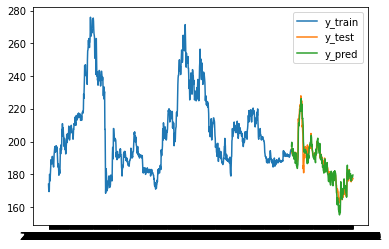

In [56]:
# 類神經網路
# 保留boll, boll_up, boll_lb相關係數過高的特徵
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# 先執行以下這段程式碼找出最適切參數
# param_grid = {'hidden_layer_sizes':[(50,50,50), (50,100,50), (100,)], 'activation': ['tanh', 'relu']}
# model_mlph = MLPRegressor()
# model_mlph=GridSearchCV(model_mlph, param_grid,scoring='r2')
# model_mlph.fit(X_trainh, y_train)
# print(model_mlph.best_score_)
# print(model_mlph.best_params_)

# 再利用找出的最適切參數來放入以下程式碼以查看r2成績
model_mlph = MLPRegressor(hidden_layer_sizes=(50, 100, 50), activation='relu')
model_mlph.fit(X_trainh, y_train)
y_pred = model_mlph.predict(X_testh)
y_pred = pd.DataFrame(y_pred, index = y_test.index,columns=['y_pred']) 
print(r2_score(y_test, y_pred)) 

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend(loc='best')

# grid_search 出來的參數 'activation': 'relu', 'hidden_layer_sizes': (50, 100, 50) , r2 0.86


-95.85901613912809


C:\Users\DA01028\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


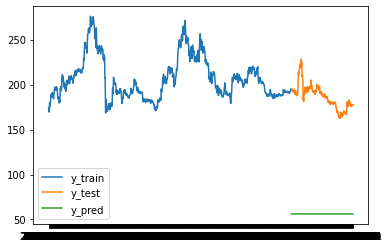

In [61]:
# 類神經網路
# 去除boll, boll_up, boll_lb相關係數過高的特徵

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# 先執行以下這段程式碼找出最適切參數
# param_grid = {'hidden_layer_sizes':[(50,50,50), (50,100,50), (100,)], 'activation': ['tanh', 'relu']}
# model_mlp = MLPRegressor()
# model_mlp=GridSearchCV(model_mlp, param_grid, scoring='r2')
# model_mlp.fit(X_train, y_train)
# print(model_mlp.best_score_)
# print(model_mlp.best_params_)


# 再利用找出的最適切參數來放入以下程式碼以查看r2成績
model_mlp = MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 100, 50))
model_mlp.fit(X_train, y_train)
y_pred = model_mlp.predict(X_test)
y_pred = pd.DataFrame(y_pred, index = y_test.index,columns=['y_pred']) 
print(r2_score(y_test, y_pred)) 

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend(loc='best')

# grid_search 出來的參數 'activation': 'tanh'->relu, 'hidden_layer_sizes': (50, 100, 50) -> (100,) r2:過低


0.6060263361542291


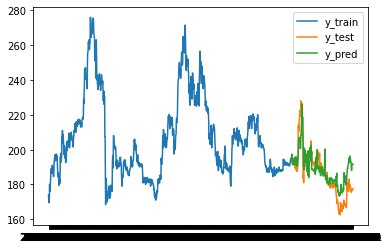

In [58]:
# kNN
# 保留boll, boll_up, boll_lb相關係數過高的特徵

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# 先執行以下這段程式碼找出最適切參數
# param_grid = {'n_neighbors':[2, 3, 4, 5, 6], 'weights': ['uniform','distance']}
# model_knnh = KNeighborsRegressor()
# model_knnh=GridSearchCV(model_knnh, param_grid, scoring='r2')
# model_knnh.fit(X_trainh, y_train)
# print(model_knnh.best_score_)
# print(model_knnh.best_params_)

# 再利用找出的最適切參數來放入以下程式碼以查看r2成績
model_knnh = KNeighborsRegressor(n_neighbors=6, weights='distance')
model_knnh.fit(X_trainh, y_train)
y_pred = model_knnh.predict(X_testh)
y_pred = pd.DataFrame(y_pred, index = y_test.index,columns=['y_pred']) 
print(r2_score(y_test, y_pred)) 

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend(loc='best')

# grid_search 出來的參數為 'n_neighbors': 6, 'weights': 'distance', r2 0.6


-1.0729188176739997


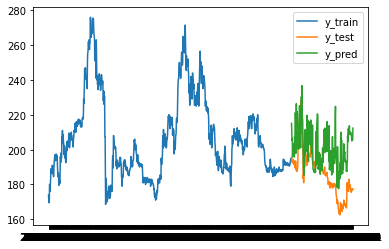

In [59]:
# kNN
# 去除boll, boll_up, boll_lb相關係數過高的特徵

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# 先執行以下這段程式碼找出最適切參數
# param_grid = {'n_neighbors':[2, 3, 4, 5, 6], 'weights': ['uniform','distance']}
# model_knn = KNeighborsRegressor()
# model_knn=GridSearchCV(model_knn, param_grid,scoring='r2')
# model_knn.fit(X_train, y_train)
# print(model_knn.best_score_)
# print(model_knn.best_params_)

# 再利用找出的最適切參數來放入以下程式碼以查看r2成績
model_knn = KNeighborsRegressor(n_neighbors=6, weights='uniform')
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
y_pred = pd.DataFrame(y_pred, index = y_test.index,columns=['y_pred']) 
print(r2_score(y_test, y_pred)) 

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend(loc='best')

# grid_search出來的參數為'n_neighbors': 6, 'weights': 'distance'->uniform, r2 過低

0.844067913480797


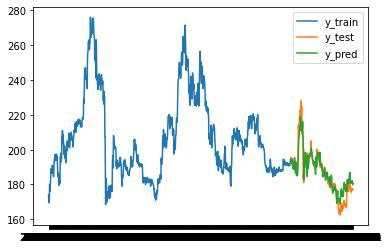

In [60]:
# Xgboost
# 保留boll, boll_up, boll_lb相關係數過高的特徵
# pip install xgboost

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 先執行以下這段程式碼找出最適切參數
# model_xgbh = xgb.XGBRegressor()
# param_grid = {'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]}
# model_xgbh = GridSearchCV(model_xgbh , param_grid=param_grid, scoring='r2')
# model_xgbh.fit(X_trainh, y_train)
# print(model_xgbh.best_score_)
# print(model_xgbh.best_params_)

# 再利用找出的最適切參數來放入以下程式碼以查看r2成績
model_xgbh = xgb.XGBRegressor(colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.6)
model_xgbh.fit(X_trainh, y_train)
y_pred = model_xgbh.predict(X_testh)
y_pred = pd.DataFrame(y_pred, index = y_test.index,columns=['y_pred']) 
print(r2_score(y_test, y_pred)) 

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend(loc='best')

# grid search result with best parameter : 'colsample_bytree': 0.6->1.0, 'gamma': 0.5->1.5, 'max_depth': 3->4, 'min_child_weight': 1->10, 'subsample': 0.6 with r2 0.84


-1.0359536281586674


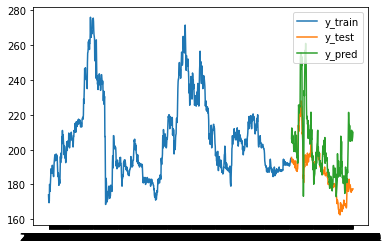

In [62]:
# Xgboost
# 去除boll, boll_up, boll_lb相關係數過高的特徵
# pip install xgboost

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 先執行以下這段程式碼找出最適切參數
# model_xgb = xgb.XGBRegressor()
# param_grid = {'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]}
# model_xgb = GridSearchCV(model_xgb , param_grid=param_grid, scoring='r2')
# model_xgb.fit(X_train, y_train)
# print(model_xgb.best_score_)
# print(model_xgb.best_params_)

# 再利用找出的最適切參數來放入以下程式碼以查看r2成績
model_xgb = xgb.XGBRegressor(colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
y_pred = pd.DataFrame(y_pred, index = y_test.index,columns=['y_pred']) 
print(r2_score(y_test, y_pred))

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend(loc='best')

# grid_search best parameters: 'colsample_bytree': 1.0->0.6, 'gamma': 1.5->5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0, with r2 過低


0.30346547472707996


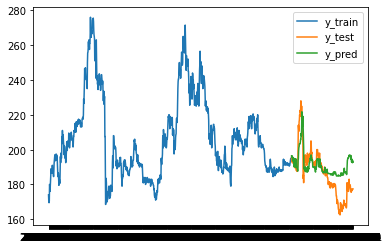

In [63]:
#AdaBoost
# 保留boll, boll_up, boll_lb相關係數過高的特徵

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# 先執行以下這段程式碼找出最適切參數
# model_adah = AdaBoostRegressor()
# param_grid = {'n_estimators':[100,200], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]}
# model_adah=GridSearchCV(model_adah, param_grid, scoring='r2')
# model_adah.fit(X_trainh, y_train)
# print(model_adah.best_score_)
# print(model_adah.best_params_)

# 再利用找出的最適切參數來放入以下程式碼以查看r2成績
model_adah = AdaBoostRegressor(learning_rate=0.1, n_estimators=100)
model_adah.fit(X_trainh, y_train)
y_pred = model_adah.predict(X_testh)
y_pred = pd.DataFrame(y_pred, index = y_test.index,columns=['y_pred']) 
print(r2_score(y_test, y_pred))

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend(loc='best')

# grid_reach best params : 'learning_rate': 0.5->0.1, 'n_estimators': 100 with r2 0.3


-1.8607334714764403


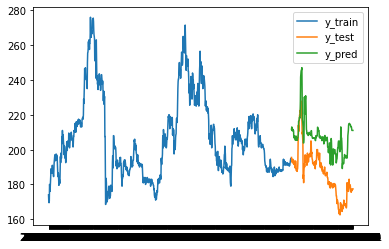

In [64]:
#AdaBoost
# 去除boll, boll_up, boll_lb相關係數過高的特徵

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# 先執行以下這段程式碼找出最適切參數
# model_ada = AdaBoostRegressor()
# param_grid = {'n_estimators':[100,200], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]}
# model_ada=GridSearchCV(model_ada, param_grid,scoring='r2')
# model_ada.fit(X_train, y_train)
# print(model_ada.best_score_)
# print(model_ada.best_params_)

# 再利用找出的最適切參數來放入以下程式碼以查看r2成績
model_ada = AdaBoostRegressor(learning_rate=0.2, n_estimators=100)
model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_test)
y_pred = pd.DataFrame(y_pred, index = y_test.index,columns=['y_pred']) 
print(r2_score(y_test, y_pred))

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend(loc='best')

# grid_search with best params : 'learning_rate': 0.1->0.2, 'n_estimators': 100, r2 過低


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5828.480, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5539.567, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5828.722, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5462.734, Time=0.40 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.91 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.37 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5464.715, Time=0.35 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5463.452, Time=0.58 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5464.278, Time=0.83 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5462.477, Time=0.52 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5539.436, Time=0.20 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=3.89 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=i

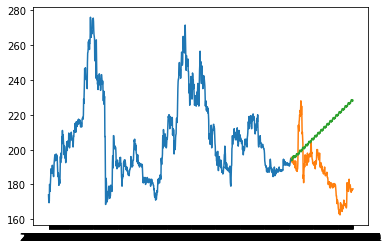

In [67]:
# Auto-ARIMA

%matplotlib inline
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

model_arima = auto_arima(y_train, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model_arima.fit(y_train)
y_pred = model_arima.predict(len(y_test))
y_pred = pd.DataFrame(y_pred, index = y_test.index,columns=['y_pred'])

print(r2_score(y_test, y_pred))

plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend(loc='best')

# Best model:  ARIMA(0,1,1)(2,1,0)[12], though the r2 is bad


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.24543624226396665


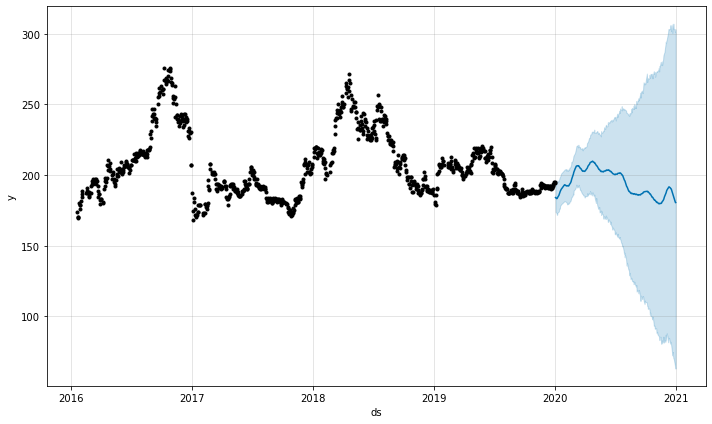

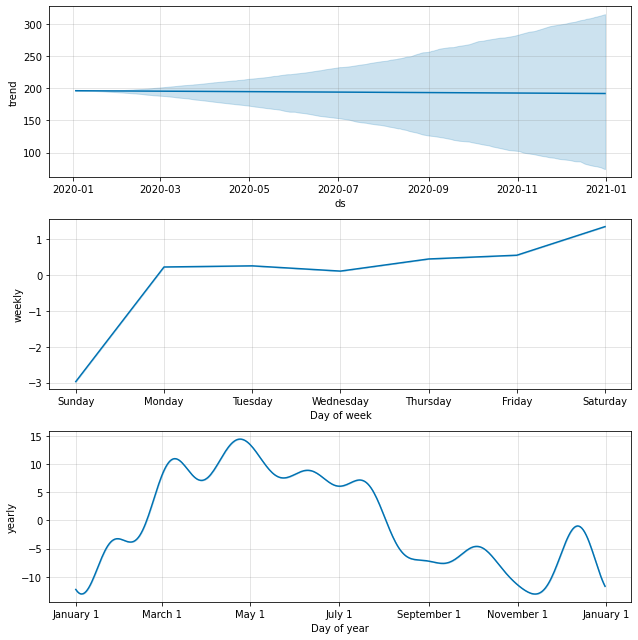

In [151]:
from fbprophet import Prophet
import plotly.offline as py
import plotly.graph_objs as go

model = Prophet()
df_prophet = pd.DataFrame(data = {'ds':y_train.index, 'y':y_train}) # feed data until 2020-01-02
model.fit(df_prophet)
# future = model.make_future_dataframe(periods=365) # fbprophet method
future = pd.DataFrame(y_test.index) # create predict date
# future = future.append({'date':'2021-01-04'}, ignore_index=True)
future.columns = ['ds']
forecast = model.predict(future)
forecast.index = forecast.ds
y_pred = forecast['yhat']
print(r2_score(y_test, y_pred))

# r2 0.24

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


In [25]:
df.iloc[-1:,1:-1]

,rsv,rsi,macd,5ma,10ma,20ma,wr,dma,trix,boll,boll_ub,boll_lb
date,,,,,,,,,,,,
2020-12-31,71.428571,54.231723,0.99954,144.071986,149.544391,153.548763,28.571429,4.02,0.09456,177.725,181.165854,174.284146


In [161]:
# 測試2021-01-04股價 : 181
# https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY_AVG.html
# 包含boll, boll_up, boll_lb

print('linear regression : ', model_lrh.predict(df.iloc[-1:,1:-1]))
print('svr : ', model_svrh.predict(df.iloc[-1:,1:-1]))
print('random forest : ', model_rfh.predict(df.iloc[-1:,1:-1]))
print('類神經 : ', model_mlph.predict(df.iloc[-1:,1:-1]))
print('knn : ', model_knnh.predict(df.iloc[-1:,1:-1]))
print('xgboost : ', model_xgbh.predict(df.iloc[-1:,1:-1]))
print('adaboost : ', model_adah.predict(df.iloc[-1:,1:-1]))
model_arima.fit(df['close'])
print('auto arima : ', model_arima.predict(1))
future = pd.DataFrame({'ds':['2021-01-04']})
print('prophet : ', model.predict(future).yhat[0])


"""
調參數後還是有包含布林通道指數的模型較接近真實股價, 前一天收盤價177.5, 跟這天的股價比較下來上漲, 
所以光這天的股價來看，表現較正確的依序為random forest, xgboost, linear regression, svr, 類神經
雖然auto arima在這裡的預測看起來準確，但因這裡丟入的資料是全部的y, 來預測下1個出現的值. 實際上它的r2不準確.
"""


linear regression :  [179.76953125]
svr :  [179.24126168]
random forest :  [181.0575]
類神經 :  [179.15656201]
knn :  [192.73484448]
xgboost :  [180.0341]
adaboost :  [192.46153846]
auto arima :  [180.20632198]
prophet :  179.10385088375187


'\n調參數後還是有包含布林通道指數的模型較接近真實股價, 前一天收盤價177.5, 跟這天的股價比較下來上漲, \n所以光這天的股價來看，表現較正確的依序為random forest, xgboost, linear regression, svr, 類神經\n雖然auto arima在這裡的預測看起來準確，但因這裡丟入的資料是全部的y, 來預測下1個出現的值. 實際上它的r2不準確.\n'

In [71]:
# 測試2021-01-04股價 : 181
# https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY_AVG.html
# 不包含boll, boll_up, boll_lb

print('linear regression : ', model_lr.predict(df.iloc[-1:,1:-4]))
print('svr : ', model_svr.predict(df.iloc[-1:,1:-4]))
print('random forest : ', model_rf.predict(df.iloc[-1:,1:-4]))
print('類神經 : ', model_mlp.predict(df.iloc[-1:,1:-4]))
print('knn : ', model_knn.predict(df.iloc[-1:,1:-4]))
print('xgboost : ', model_xgb.predict(df.iloc[-1:,1:-4]))
print('adaboost : ', model_ada.predict(df.iloc[-1:,1:-4]))
model_arima.fit(df['close'])
print('auto arima : ', model_arima.predict(1))

"""
調參數後沒有包含布林通道指數的模型表現幾乎全部不佳
"""

linear regression :  [217.55501048]
svr :  [215.26892886]
random forest :  [211.23813693]
類神經 :  [56.18459815]
knn :  [215.66666667]
xgboost :  [212.11057]
adaboost :  [211.02051282]
auto arima :  [180.20632198]


'\n調參數後沒有包含布林通道指數的模型表現幾乎全部不佳\n'

In [58]:
df

,date,rsv,rsi,macd,5ma,10ma,20ma,wr,dma,trix,boll,boll_ub,boll_lb,close
0,2016-09-20,4.081633,0.000000,0.000000,0.000000,0.000000,0.000000,95.918367,0.00,0.000000,47.150000,0.000000,0.000000,47.15
1,2016-09-21,42.528736,0.000000,-0.003365,0.000000,0.000000,0.000000,57.471264,0.00,-0.050560,47.075000,47.287132,46.862868,47.00
2,2016-09-22,41.379310,0.000000,-0.005839,0.000000,0.000000,0.000000,58.620690,0.00,-0.043726,47.033333,47.241500,46.825167,46.95
3,2016-09-23,54.022989,75.782074,0.013037,0.000000,0.000000,0.000000,45.977011,0.00,-0.000461,47.150000,47.646655,46.653345,47.50
4,2016-09-26,44.827586,47.555865,0.007102,0.000000,0.000000,0.000000,55.172414,0.00,0.007316,47.140000,47.572435,46.707565,47.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,2020-12-25,72.222222,48.643582,-2.276338,56.739392,59.088411,83.854390,27.777778,-10.19,-0.399003,115.300000,120.923260,109.676740,117.00
1047,2020-12-28,55.555556,46.571262,-2.105367,63.307714,57.806452,80.574611,44.444444,-9.85,-0.355530,114.975000,119.636996,110.313004,115.50
1048,2020-12-29,27.777778,43.263131,-2.146853,70.719190,55.834168,78.301136,72.222222,-9.37,-0.323573,114.675000,119.006950,110.343050,113.00
1049,2020-12-30,83.333333,50.791780,-1.756030,78.754467,56.513971,76.825622,16.666667,-8.95,-0.284117,114.775000,119.322700,110.227300,118.00


In [ ]:
# 考慮股價資料完整性，將只針對上市滿5年的公司進行股價分析，把2016/1/19後才上市的公司移入under_5_years資料夾
if os.path.exists(r'.\2_eda_沒正規化資料_bm\under_5_years') :
    file_list = os.listdir(r'.\2_eda_沒正規化資料_bm')
    for file in file_list:
        if file == 'under_5_years':
            pass
        else :
            df = pd.read_csv(os.path.join(r'.\2_eda_沒正規化資料_bm', file))
            if df.iloc[0,0] == '2016-01-18' or df.iloc[0,0] < '2016-01-18' :
                pass
            else:
                shutil.move(os.path.join(r'.\2_eda_沒正規化資料_bm', file), r'.\2_eda_沒正規化資料_bm\under_5_years')
else :
    os.mkdir(r'.\2_eda_沒正規化資料_bm\under_5_years')
    file_list = os.listdir(r'.\2_eda_沒正規化資料_bm')
    for file in file_list:
        if file == 'under_5_years':
            pass
        else :
            df = pd.read_csv(os.path.join(r'.\2_eda_沒正規化資料_bm', file))
            if df.iloc[0,0] == '2016-01-18' or df.iloc[0,0] < '2016-01-18' :
                pass
            else:
                shutil.move(os.path.join(r'.\2_eda_沒正規化資料_bm', file), r'.\2_eda_沒正規化資料_bm\under_5_years')

In [ ]:
# 考慮股價資料完整性，將只針對上市滿5年的公司進行股價分析，把2016/1/19後才上市的公司移入under_5_years資料夾
if os.path.exists(r'.\2_eda_沒正規化資料_tb\under_5_years') :
    file_list = os.listdir(r'.\2_eda_沒正規化資料_tb')
    for file in file_list:
        if file == 'under_5_years':
            pass
        else :
            df = pd.read_csv(os.path.join(r'.\2_eda_沒正規化資料_tb', file))
            if df.iloc[0,0] == '2016-01-18' or df.iloc[0,0] < '2016-01-18' :
                pass
            else:
                shutil.move(os.path.join(r'.\2_eda_沒正規化資料_tb', file), r'.\2_eda_沒正規化資料_tb\under_5_years')
else :
    os.mkdir(r'.\2_eda_沒正規化資料_tb\under_5_years')
    file_list = os.listdir(r'.\2_eda_沒正規化資料_tb')
    for file in file_list:
        if file == 'under_5_years':
            pass
        else :
            df = pd.read_csv(os.path.join(r'.\2_eda_沒正規化資料_tb', file))
            if df.iloc[0,0] == '2016-01-18' or df.iloc[0,0] < '2016-01-18' :
                pass
            else:
                shutil.move(os.path.join(r'.\2_eda_沒正規化資料_tb', file), r'.\2_eda_沒正規化資料_tb\under_5_years')